In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = np.arange(1, 10000, 1)
y = x * (x-1)/2

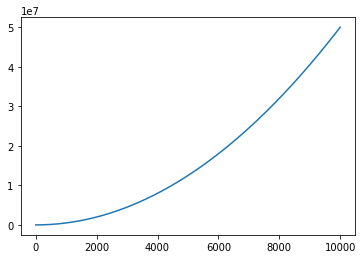

In [4]:
plt.plot(x,y)

In [5]:
df = pd.read_csv("C:/Users/Raksha/Desktop/RAKSHA/TECHNICAL/PYTHON_ML_AI_DL/Libraries&Assigments/Datasets/Mall_customers.csv")
df.shape

(200, 5)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
model = LabelEncoder()

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.Gender = model.fit_transform(df.Gender)

In [10]:
fm = df.iloc[:, 1:]

In [11]:
fm.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
model_ac = AgglomerativeClustering()

In [14]:
model_ac.fit(fm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [15]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

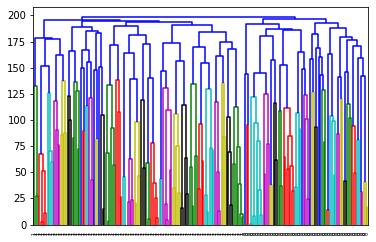

In [16]:
from scipy.cluster import hierarchy
plot_dendrogram(model_ac, labels=model_ac.labels_)

In [17]:
df['HC']= model_ac.labels_

In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),HC
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(fm, model_ac.labels_)

0.29916602844367

In [20]:
ss = []
nc = np.arange(2, 20 ,1)

for c in nc:
    
    model = AgglomerativeClustering(n_clusters=c)
    model_ac.fit(fm)
    
    ss.append(silhouette_score(fm, model_ac.labels_))


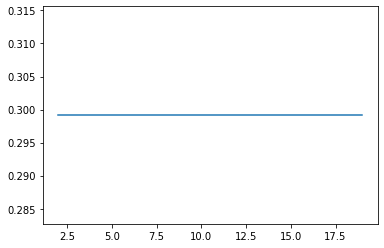

In [21]:
plt.plot(nc,ss)

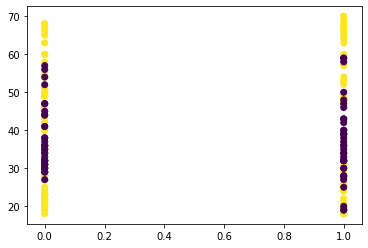

In [22]:
plt.scatter(df.Gender, df.Age, c=df.HC)

Text(0, 0.5, 'Spending')

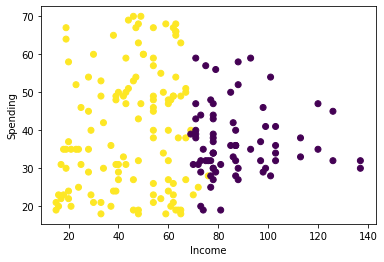

In [50]:
plt.scatter(df['Annual Income (k$)'],df.Age, c=df.HC)
plt.xlabel('Income')
plt.ylabel('Spending')


In [26]:
from sklearn.cluster import KMeans

In [30]:
model_km = KMeans(n_clusters=3)

In [34]:
model_km.fit(fm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
model_km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [36]:
model_km.inertia_

143391.59236035682

In [41]:
model_km.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [42]:
fm.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [45]:
i_centers = model_km.cluster_centers_[:,-2:]
ss_centers = model_km.cluster_centers_[:,-2:]

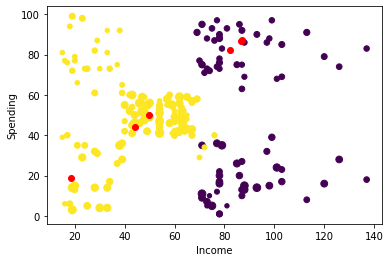

In [49]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],df.Age, c=df.HC)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.scatter(i_centers,ss_centers,c='red')

In [59]:
k_vals = np.arange(2,20,1)
in_vals = []
ss_vals = []

for k in k_vals:
    model_km = KMeans(n_clusters = k)
    model_km.fit(fm)
    in_vals.append(model_km.inertia_)
    ss_vals.append(silhouette_score(fm, model_km.labels_))

In [62]:
k_vals

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [61]:
in_vals

[212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51147.01731797614,
 44389.807673557676,
 40670.989962363215,
 37509.9794142639,
 34440.62350409338,
 32173.428291193508,
 30106.82390299759,
 27770.909457671958,
 26236.377583527585,
 24921.27729076479,
 23427.416594662944,
 22061.503842605624,
 20849.1574338673]

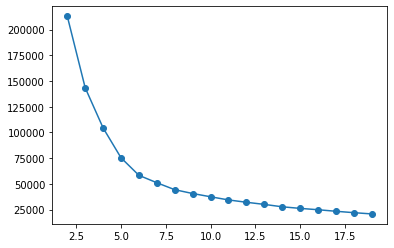

In [60]:
plt.plot(k_vals,in_vals, "-o")

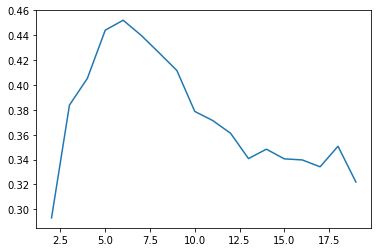

In [63]:
plt.plot(k_vals,ss_vals)

In [64]:
model_km = KMeans(n_clusters=6)
model_km.fit(fm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
model_km.labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 5,
       4, 3, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [66]:
model_km.inertia_

58348.64136331505

In [67]:
model_km.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])